In [2]:
import numpy as np
import pandas as pd

In [2]:
#简单处理数据-1   算总量

train = np.loadtxt('train_20171215.txt',dtype='int')

pro_train = []
i_pro_train = 0
pro_train.append(train[0])

for i in range(1,train.shape[0]):
    if train[i][0] == pro_train[i_pro_train][0]:
        pro_train[i_pro_train][3] += train[i][3]
    else:
        i_pro_train += 1
        pro_train.append(train[i])

pro_train = np.array(pro_train)

print(pro_train)

# 去掉类别那一行
pro_train = np.delete(pro_train,2,axis=1)

pro_train

[[   1    3    1   68]
 [   2    4    1   36]
 [   3    5    1 5565]
 ..., 
 [1030    2    1 4003]
 [1031    3    1 2513]
 [1032    4    1 1306]]


array([[   1,    3,   68],
       [   2,    4,   36],
       [   3,    5, 5565],
       ..., 
       [1030,    2, 4003],
       [1031,    3, 2513],
       [1032,    4, 1306]])

In [43]:
# 加载测试数据
test = np.loadtxt('test_A_20171225.txt',dtype='int')

In [16]:
# 写文件
np.savetxt('data_date-weekday-sum.txt', pro_train, fmt='%d', delimiter = '\t')  

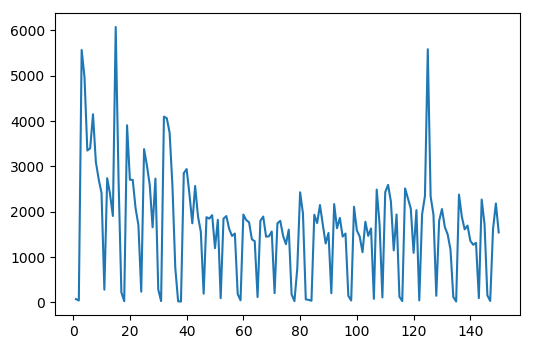

In [34]:
# 画图看看数据变动

import matplotlib.pyplot as plt
%matplotlib inline
x = pro_train[:,0]
y = pro_train[:,2]

x = x[0:150]
y = y[0:150]

plt.figure(dpi=100)
plt.plot(x,y)

In [46]:
# 我先看看有多少个星期
num_week_train = 1
for i in range( 0,pro_train.shape[0]-1 ):
    if pro_train[i+1][1] < pro_train[i][1]:
        num_week_train += 1
print('num_week_train: ',num_week_train)

num_week_train:  170


In [47]:
# 看看test数据中包含多少个星期
num_week_test = 1
for i in range( 0,test.shape[0]-1 ):
    if test[i+1][1] < test[i][1]:
        num_week_test += 1
print('num_week_train: ',num_week_test)

num_week_train:  45


In [ ]:
'''2018/01/09'''
from __future__ import print_function
import pandas as pd
import numpy as np
from scipy import  stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
%matplotlib inline

In [7]:
'''#处理数据-2   分星期算总量 并存好文件'''

import numpy as np
import pandas as pd

train = np.loadtxt('data_date-weekday-sum.txt',dtype='int')

print(train[0][0],train[0][1],train[0][2])   # 1 3 68
print(train[1][0],train[1][1],train[1][2])   # 2 4 36

train.shape  # (1032, 3)

1 3 68
2 4 36


(1032, 3)

In [16]:
def data_week(train)
    Mon = Tues = Wed = Thur = Fri = Sat = Sun = 0

    for i in range(train.shape[0]):
        if train[i][1] == 1:
            Mon = Mon + 1
        if train[i][1] == 2:
            Tues = Tues + 1
        if train[i][1] == 3:
            Wed = Wed + 1
        if train[i][1] == 4:
            Thur = Thur + 1
        if train[i][1] == 5:
            Fri = Fri + 1
        if train[i][1] == 6:
            Sat = Sat + 1
        if train[i][1] == 7:
            Sun = Sun + 1
    print(Mon,Tues,Wed,Thur,Fri,Sat,Sun)

In [22]:
print("train: ",data_week(train))
print("test: ",data_week(test))

160 163 165 166 164 160 54
train:  None
42 43 44 46 42 43 16
test:  None


In [61]:
def data_week_save(folder,train):
    Mon = []
    Tues = []
    Wed = []
    Thur = []
    Fri = []
    Sat = []
    Sun = []
    for i in range(train.shape[0]):
        if train[i][1] == 1:
            Mon.append(train[i][2])
        if train[i][1] == 2:
            Tues.append(train[i][2])
        if train[i][1] == 3:
            Wed.append(train[i][2])
        if train[i][1] == 4:
            Thur.append(train[i][2])
        if train[i][1] == 5:
            Fri.append(train[i][2])
        if train[i][1] == 6:
            Sat.append(train[i][2])
        if train[i][1] == 7:
            Sun.append(train[i][2])
    # 写文件
    np.savetxt(folder+'Sum-Mon.txt', Mon, fmt='%d', delimiter = '\t')
    np.savetxt(folder+'Sum-Tues.txt', Tues, fmt='%d', delimiter = '\t')
    np.savetxt(folder+'Sum-Wed.txt', Wed, fmt='%d', delimiter = '\t')
    np.savetxt(folder+'Sum-Thur.txt', Thur, fmt='%d', delimiter = '\t')
    np.savetxt(folder+'Sum-Fri.txt', Fri, fmt='%d', delimiter = '\t')
    np.savetxt(folder+'Sum-Sat.txt', Sat, fmt='%d', delimiter = '\t')
    np.savetxt(folder+'Sum-Sun.txt', Sun, fmt='%d', delimiter = '\t')

In [63]:
data_week_save('sum-week/train/',train)

In [87]:
'''#处理数据-3   根据星期算总量之后，先搞个平均数提交一下试试'''

data = np.loadtxt('test_A_20171225.txt',dtype='int')
test = data[:,1]
ID = data[:,0]

In [3]:
Mon = np.loadtxt('sum-week/train/Sum-Mon.txt',dtype='int')
Tues = np.loadtxt('sum-week/train/Sum-Tues.txt',dtype='int')
Wed = np.loadtxt('sum-week/train/Sum-Wed.txt',dtype='int')
Thur = np.loadtxt('sum-week/train/Sum-Thur.txt',dtype='int')
Fri = np.loadtxt('sum-week/train/Sum-Fri.txt',dtype='int')
Sat = np.loadtxt('sum-week/train/Sum-Sat.txt',dtype='int')
Sun = np.loadtxt('sum-week/train/Sum-Sun.txt',dtype='int')

In [89]:
for i in range(test.shape[0]):
    if(test[i] == 1):
        test[i] = round(np.average(Mon))
    if(test[i] == 2):
        test[i] = round(np.average(Tues))
    if(test[i] == 3):
        test[i] = round(np.average(Wed))
    if(test[i] == 4):
        test[i] = round(np.average(Thur))
    if(test[i] == 5):
        test[i] = round(np.average(Fri))
    if(test[i] == 6):
        test[i] = round(np.average(Sat))
    if(test[i] == 7):
        test[i] = round(np.average(Sun))

In [90]:
test

array([1626, 1889,  412, 2364, 2496, 2095, 1626, 1889,  412, 2364, 2496,
       2095, 1626, 1889,  412, 2364, 2496, 2095, 1626, 1889,  412, 2496,
       2095, 1626, 1889,  412, 2364, 2496, 2095, 1626, 1889,  412, 2364,
       2496, 2095, 1626, 1889,  412, 2364, 2496, 2095, 1626, 1889,  412,
       2364, 2496, 2095, 1626, 1889,  412, 2364, 2496, 2095, 1626,  412,
        743, 2364, 2496, 2095, 1626, 1889,  412,  743, 2364, 2496, 2095,
       1626, 1889,  412, 2364, 2496, 2095, 1626, 1889,  412, 2364, 2496,
       2095, 1626, 1889,  412, 2364, 2496, 2095, 1626, 1889,  412, 2364,
       2496, 2095, 1626, 1889,  412, 2364, 2496, 2095, 1626, 1889,  412,
       2364, 2496, 2095, 1626, 1889,  412, 2364, 2496, 2095, 1626, 1889,
        412, 2364, 2496, 2095, 1626, 1889,  412,  743, 2364, 2496, 2095,
       1626, 1889,  412, 2364, 2496, 2095, 1626, 1889,  412,  743, 2364,
       2496, 2095, 1626, 1889,  412, 2364, 2496, 2095, 1626,  412,  743,
       2364, 2496, 2095, 1626, 1889,  412, 2364, 24

In [91]:
ans = np.vstack( (ID,test) )

In [96]:
ans = ans.T
ans

array([[1032, 1626],
       [1033, 1889],
       [1034,  412],
       [1035, 2364],
       [1036, 2496],
       [1037, 2095],
       [1038, 1626],
       [1039, 1889],
       [1040,  412],
       [1041, 2364],
       [1042, 2496],
       [1043, 2095],
       [1044, 1626],
       [1045, 1889],
       [1046,  412],
       [1047, 2364],
       [1048, 2496],
       [1049, 2095],
       [1050, 1626],
       [1051, 1889],
       [1052,  412],
       [1053, 2496],
       [1054, 2095],
       [1055, 1626],
       [1056, 1889],
       [1057,  412],
       [1058, 2364],
       [1059, 2496],
       [1060, 2095],
       [1061, 1626],
       [1062, 1889],
       [1063,  412],
       [1064, 2364],
       [1065, 2496],
       [1066, 2095],
       [1067, 1626],
       [1068, 1889],
       [1069,  412],
       [1070, 2364],
       [1071, 2496],
       [1072, 2095],
       [1073, 1626],
       [1074, 1889],
       [1075,  412],
       [1076, 2364],
       [1077, 2496],
       [1078, 2095],
       [1079,

In [98]:
# 写入文件
np.savetxt('submit/'+'week-average.txt',ans, fmt='%d', delimiter = '\t')

In [104]:
'''#处理数据-4   根据星期算总量之后，画图看看效果'''
import matplotlib.pyplot as plt
def plot_results(data):
    plt.plot(data)
    plt.legend()
    plt.show()

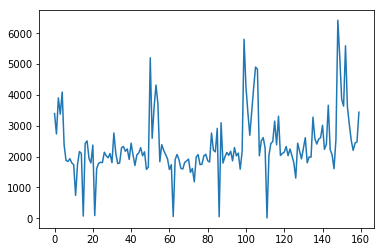

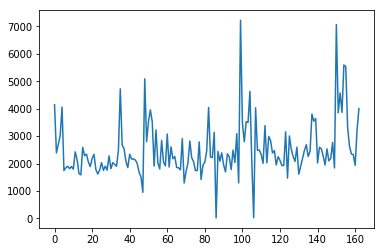

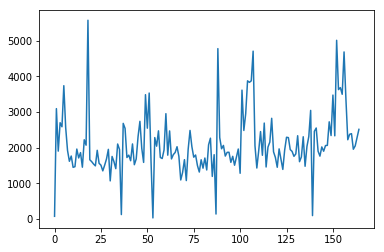

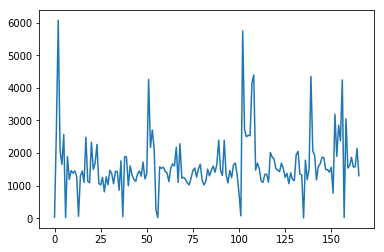

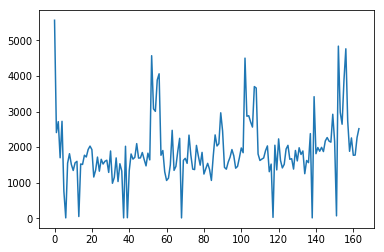

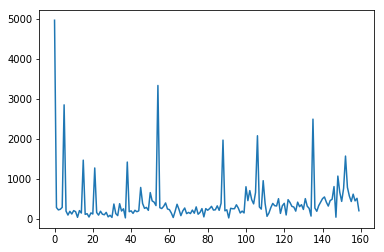

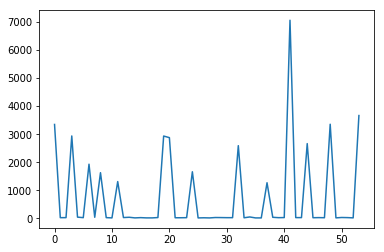

In [107]:
plot_results(Mon)
plot_results(Tues)
plot_results(Wed)
plot_results(Thur)
plot_results(Fri)
plot_results(Sat)
plot_results(Sun)

In [43]:
'''#处理数据-5   七个周天，七种预测值'''
    
'''切数据'''
def slicing_data(data,seq_len):    
    
    print('result len(data):',len(data))
    print('result data.shape:',np.array(data).shape)
    
    sequence_length = seq_len + 1
    result = []
    for index in range(len(data) - sequence_length):
        result.append(data[index: index + sequence_length])  #得到长度为seq_len+1的向量，最后一个作为label
    
    print('result len(slicing):',len(result))
    print('result slicing_shape:',np.array(result).shape)
    print(result[:1])
    
    result = np.array(result)
    
    #划分train、test
    row = len(result)-1  #四舍五入
    train = result[:row, :]
    np.random.shuffle(train)
    x_train = train[:, :-1]
    y_train = train[:, -1]
    x_test = result[row:, :-1]
    y_test = result[row:, -1]
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

#    print('result x_train.shape',x_train.shape)
#    print('result y_train.shape',y_train.shape)
#    print('result x_test.shape',x_test.shape)
#    print('result y_test.shape',y_test.shape)
 
    return [x_train, y_train, x_test, y_test]

In [37]:
    '''跑模型 LSTM'''
# -*- coding: utf-8 -*-

from __future__ import print_function

import warnings
import numpy as np
import time
import matplotlib.pyplot as plt
from numpy import newaxis
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential

warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [58]:
def build_model(layers): #layers ： [1,50,100,1]
    model = Sequential()

    model.add(LSTM(input_dim=layers[0],output_dim=layers[1],return_sequences=True))
    model.add(Dropout(0.2))

    model.add(LSTM(layers[2],return_sequences=False))
    model.add(Dropout(0.2))

    model.add(Dense(output_dim=layers[3]))
    model.add(Activation("linear"))

    model.compile(loss="mse", optimizer="rmsprop")
    return model

#直接全部预测
def predict_point_by_point(model, data):
    predicted = model.predict(data)
    print('predicted shape:',np.array(predicted).shape)  #(412L,1L)
    predicted = np.reshape(predicted, (predicted.size,))
    return predicted

'''训练模型'''
model = build_model([1, 50, 100, 1])


In [59]:
'''跑数据和模型'''
epochs  = 1
seq_len = 50

X_train, y_train, X_test, y_test = slicing_data( Mon , seq_len )
print('X_train shape:',X_train.shape)  #(3709L, 50L, 1L)
print('y_train shape:',y_train.shape)  #(3709L,)
print('X_test shape:',X_test.shape)    #(412L, 50L, 1L)
print('y_test shape:',y_test.shape)    #(412L,)

model.fit(X_train,y_train,batch_size=128,nb_epoch=epochs,validation_split=0.05)
'''做预测'''
point_by_point_predictions = predict_point_by_point(model, X_test)
print('point_by_point_predictions shape:',np.array(point_by_point_predictions).shape)  #(412L)

result len(data): 160
result data.shape: (160,)
result len(slicing): 109
result slicing_shape: (109, 51)
[array([3396, 2735, 3903, 3377, 4094, 2377, 1874, 1843, 1933, 1797, 1739,
        744, 1745, 2164, 2104,   73, 2427, 2509, 1940, 1794, 2374,   89,
       1612, 1778, 1819, 1804, 2141, 2028, 1961, 2100, 1804, 2765, 2106,
       1775, 1794, 2288, 2330, 2172, 2250, 1909, 2436, 2059, 1712, 2057,
       2118, 2290, 2026, 2156, 1587, 1660, 5202])]
X_train shape: (108, 50, 1)
y_train shape: (108,)
X_test shape: (1, 50, 1)
y_test shape: (1,)
Train on 102 samples, validate on 6 samples
Epoch 1/1
102/102 [==============================] - 1s - loss: 7409719.0000 - val_loss: 6232396.5000
predicted shape: (1, 1)
point_by_point_predictions shape: (1,)


In [60]:
point_by_point_predictions

array([ 1.03587639], dtype=float32)